**Import Packages**

In [1]:
import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**Reading The Data**

In [31]:
df = pd.read_csv('Telco Customer Churn.csv')

**Initial EDA**

In [32]:
# Display the first 5 rows
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [33]:
# Get the dataframe's info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [25]:
# simple data checking - get row and column of dataframe
df.shape

(7043, 21)

In [34]:
# Sort dataframe's
df.sort_values(by=['TotalCharges'])

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6646,8249-THVEC,Male,0,Yes,Yes,51,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.40,997.75,No
5598,6051-PTVNS,Female,0,Yes,Yes,55,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.15,998.1,No
3686,5899-MQZZL,Female,0,No,No,13,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,75.00,999.45,Yes
3353,4536-PLEQY,Male,0,Yes,No,12,Yes,No,Fiber optic,No,...,No,No,No,Yes,Month-to-month,Yes,Credit card (automatic),85.05,999.8,No


In [35]:
# counts unique values in df
for col in df.select_dtypes('object').columns:
    print(col, '- # unique values:', df[col].nunique())

customerID - # unique values: 7043
gender - # unique values: 2
Partner - # unique values: 2
Dependents - # unique values: 2
PhoneService - # unique values: 2
MultipleLines - # unique values: 3
InternetService - # unique values: 3
OnlineSecurity - # unique values: 3
OnlineBackup - # unique values: 3
DeviceProtection - # unique values: 3
TechSupport - # unique values: 3
StreamingTV - # unique values: 3
StreamingMovies - # unique values: 3
Contract - # unique values: 3
PaperlessBilling - # unique values: 2
PaymentMethod - # unique values: 4
TotalCharges - # unique values: 6531
Churn - # unique values: 2


- There are 7043 rows of data with 21 columns
- The target variable is `Churn` and possible dropped column is `custumerID`
- Data have categorical and integer values.
- Data `TotalCharges` is not normal because it's an object that should be an integer/float
- Column `TotalCharges` has null/missing values.

**Correction Data Types**

In [38]:
# convert TotalCharges to numeric values
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

**Data Cleansing**

In [12]:
# counts values each column in df
for col in df.select_dtypes('object').columns:
    print(col, '\n')
    print(df[col].value_counts(), '\n')

customerID 

4342-HENTK    1
8739-QOTTN    1
1043-YCUTE    1
6341-AEVKX    1
8746-BFOAJ    1
             ..
1818-ESQMW    1
8751-EDEKA    1
6317-YPKDH    1
8325-QRPZR    1
2984-TBYKU    1
Name: customerID, Length: 7043, dtype: int64 

gender 

Male      3555
Female    3488
Name: gender, dtype: int64 

Partner 

No     3641
Yes    3402
Name: Partner, dtype: int64 

Dependents 

No     4933
Yes    2110
Name: Dependents, dtype: int64 

PhoneService 

Yes    6361
No      682
Name: PhoneService, dtype: int64 

MultipleLines 

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64 

InternetService 

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64 

OnlineSecurity 

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64 

OnlineBackup 

No                     3088
Yes                    2429
No internet service    1526
Name: On

In [39]:
# handle missing value 'TotalCharges'
df.loc[:,'TotalCharges'] = df.loc[:,'TotalCharges'].replace(np.nan,0)

In [41]:
# drop custumer ID
df = df.drop(['customerID'], axis=1)

**Target Feature Analisys**

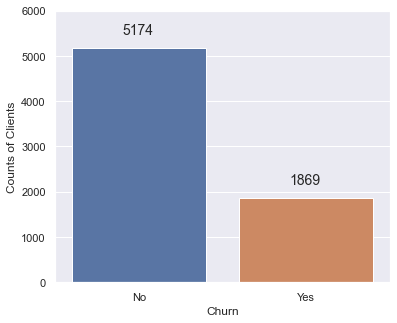

In [59]:
plt.figure(figsize=(6,5))

ax = sns.countplot(x='Churn', data=df)

plt.xlabel('Churn', fontsize= 12)
plt.ylabel('Counts of Clients', fontsize= 12)
plt.ylim(0,6000)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 14)
    
plt.show()

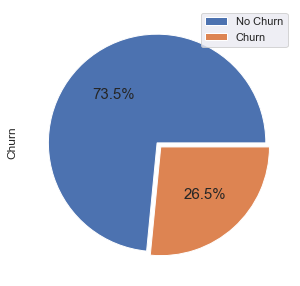

In [58]:
plt.figure(figsize=(6,5))

df['Churn'].value_counts().plot(kind='pie',labels = ['',''], autopct='%1.1f%%', explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['No Churn', 'Churn'])
plt.show()

There is a 26.5% of Custumer Churn

**Gender Analisys**

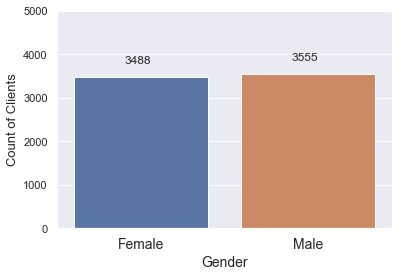

In [44]:
ax = sns.countplot(data = df, x = "gender")
plt.xlabel("Gender", fontsize= 14)
plt.ylabel("Count of Clients", fontsize= 13)
plt.ylim(0,5000)
plt.xticks(fontsize= 14)

for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 12)

plt.show()

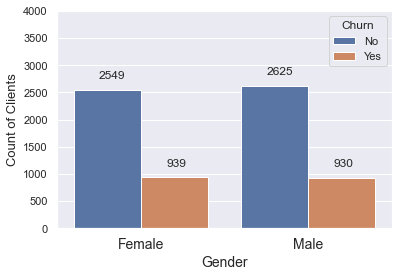

In [45]:
ax = sns.countplot(data = df, x = "gender", hue="Churn")
plt.xlabel("Gender", fontsize= 14)
plt.ylabel("Count of Clients", fontsize= 13)
plt.ylim(0,4000)
plt.xticks(fontsize= 14)

for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.15, p.get_height()+200), fontsize = 12)

plt.show()

Gender doesn't affect churn or not

**Demo Analisys**

In [52]:
demo_features = ['Partner', 'Dependents']

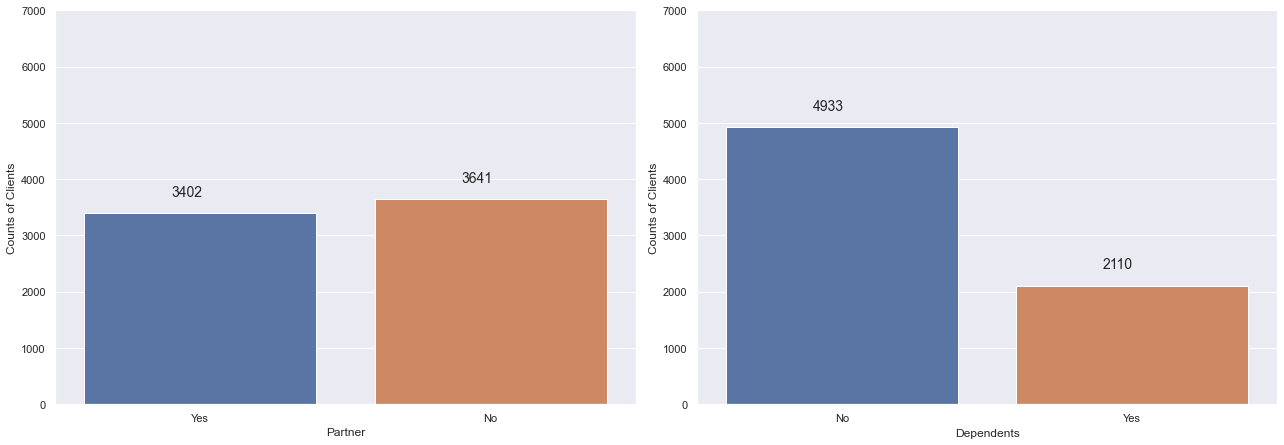

In [53]:
plt.figure(figsize=(18,12))

for i, col in enumerate(demo_features):
    
    plt.subplot(2, 2, i + 1)
    ax = sns.countplot(x=col, data=df)
    
    plt.xlabel(col, fontsize= 12)
    plt.ylabel('Counts of Clients', fontsize= 12)
    plt.ylim(0,7000)
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 14)
    
plt.tight_layout()    
    
plt.show()

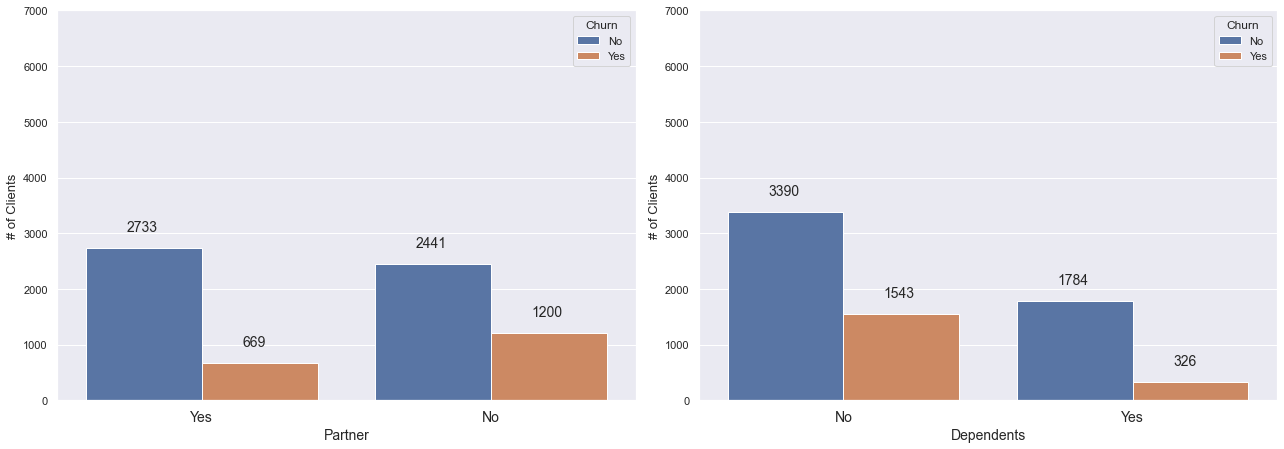

In [54]:
plt.figure(figsize=(18,12))

for i,col in enumerate(demo_features):    
    plt.subplot(2,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn")

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.14, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

**Service Analysis**

In [46]:
service_features = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
                    'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
                    'StreamingMovies']

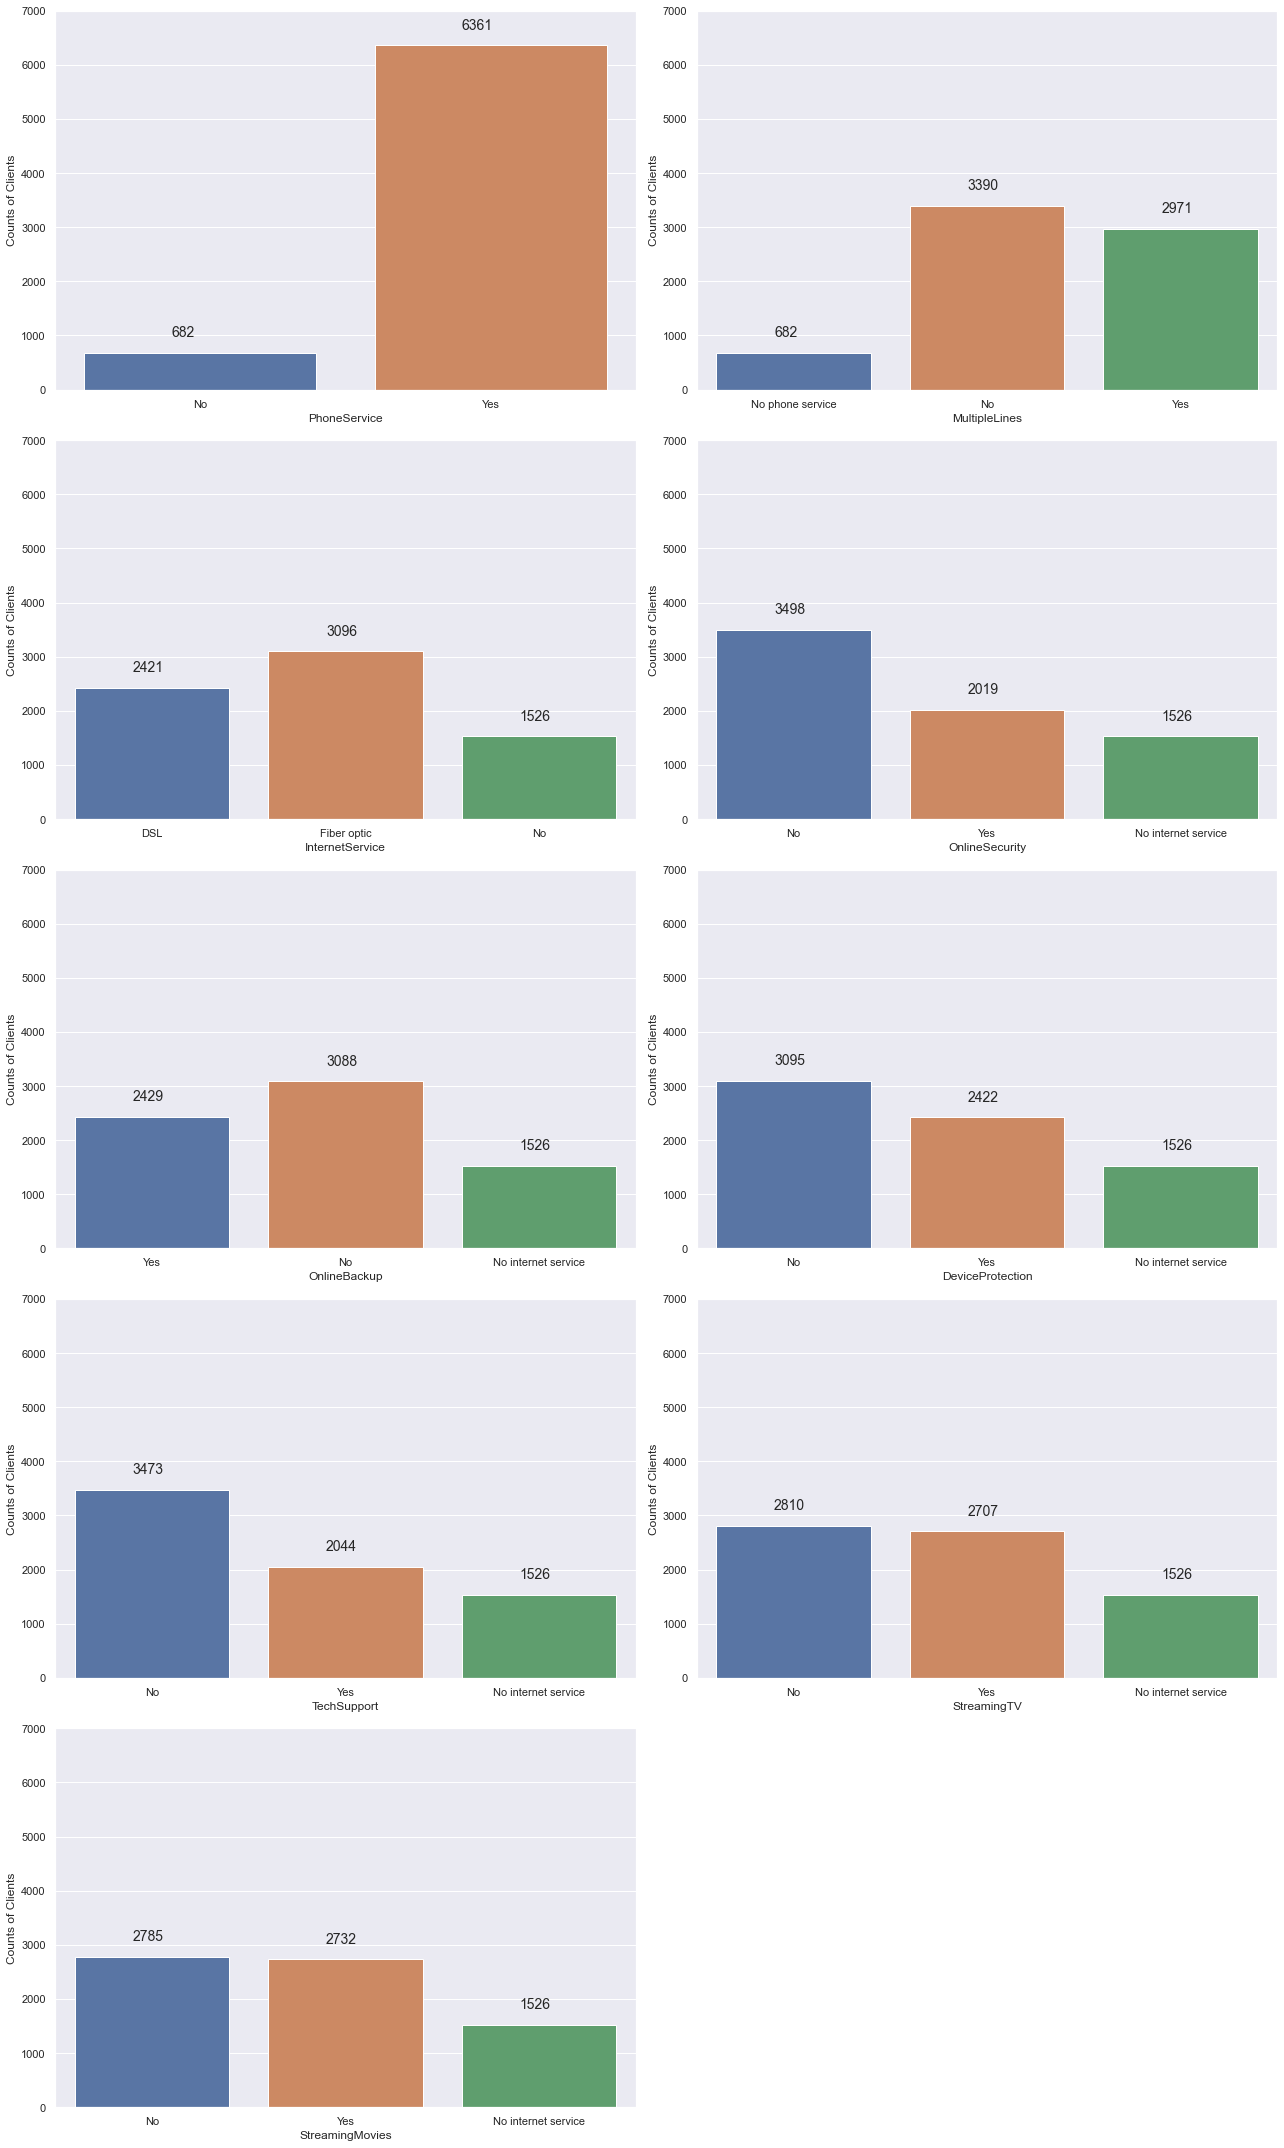

In [47]:
plt.figure(figsize=(18,30))

for i, col in enumerate(service_features):
    
    plt.subplot(5, 2, i + 1)
    ax = sns.countplot(x=col, data=df)
    
    plt.xlabel(col, fontsize= 12)
    plt.ylabel('Counts of Clients', fontsize= 12)
    plt.ylim(0,7000)
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 14)
    
plt.tight_layout()    
    
plt.show()

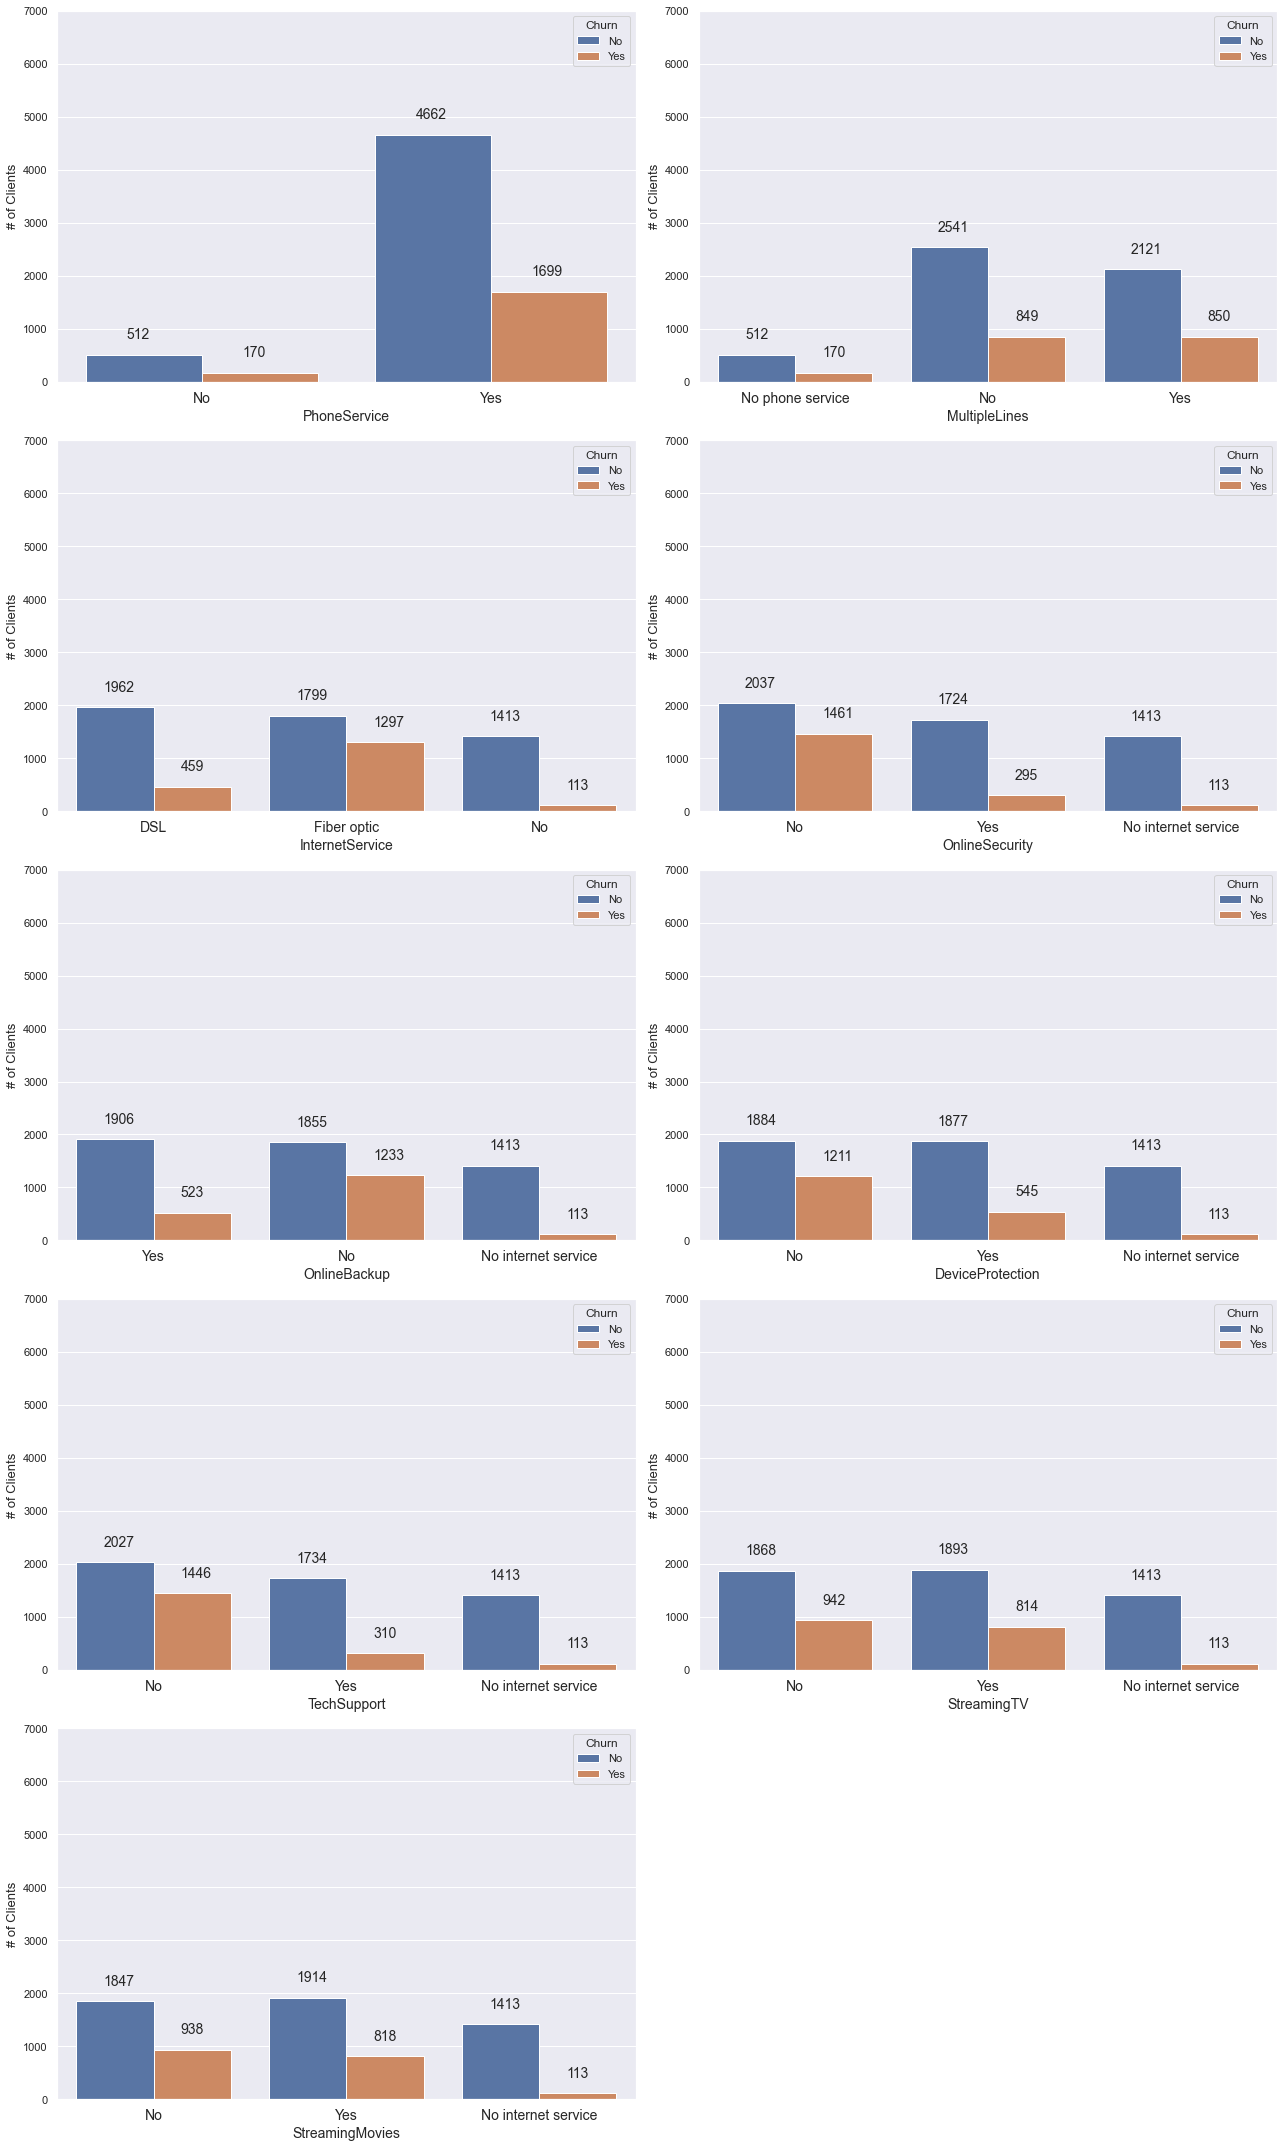

In [48]:
plt.figure(figsize=(18,30))

for i,col in enumerate(service_features):    
    plt.subplot(5,2,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn")

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,7000)
    plt.xticks(fontsize= 14)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.14, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

**Account Info Analysis**

In [55]:
acc_info_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']

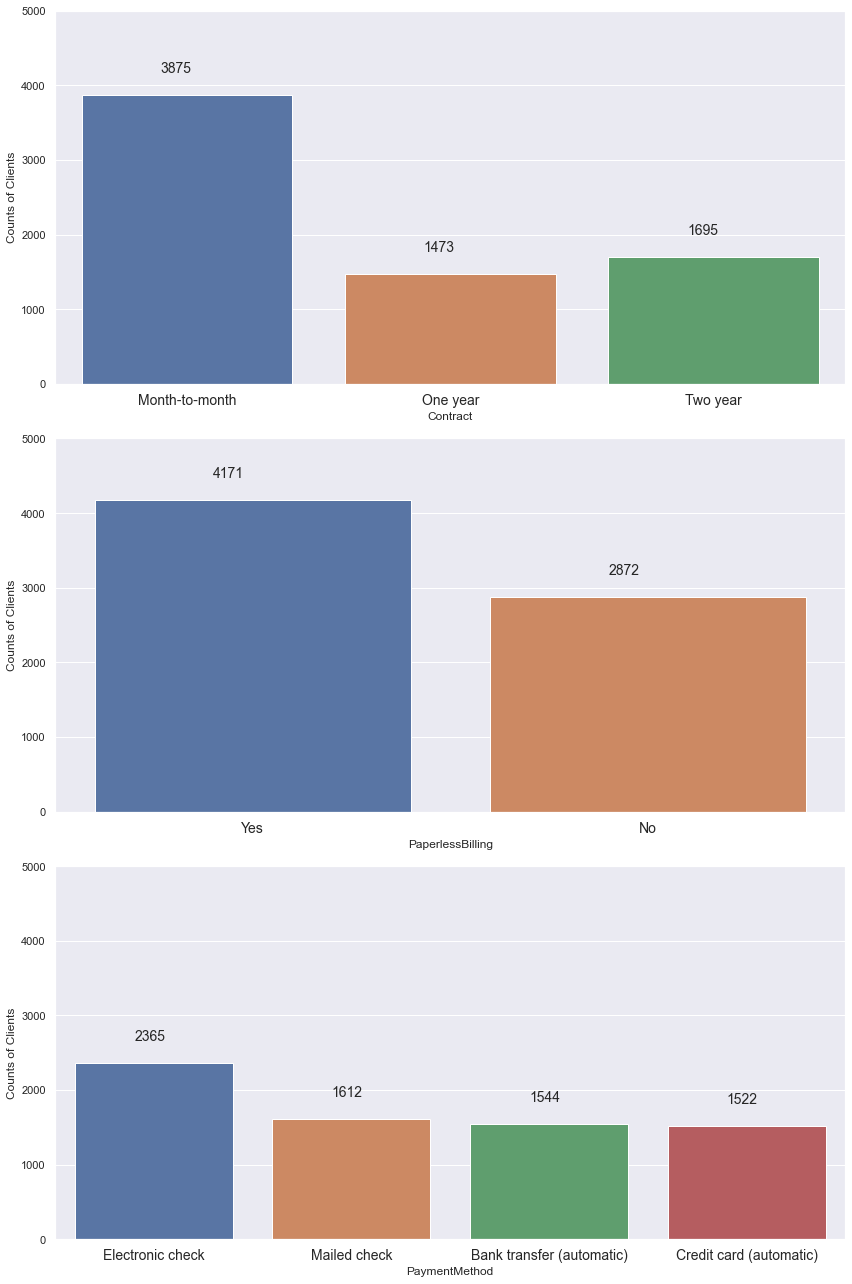

In [56]:
plt.figure(figsize=(12,18))

for i, col in enumerate(acc_info_features):
    
    plt.subplot(3, 1, i + 1)
    ax = sns.countplot(x=col, data=df)
    
    plt.xlabel(col, fontsize= 12)
    plt.ylabel('Counts of Clients', fontsize= 12)
    plt.ylim(0,5000)
    plt.xticks(size=14)
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 14)
    
plt.tight_layout()    
    
plt.show()

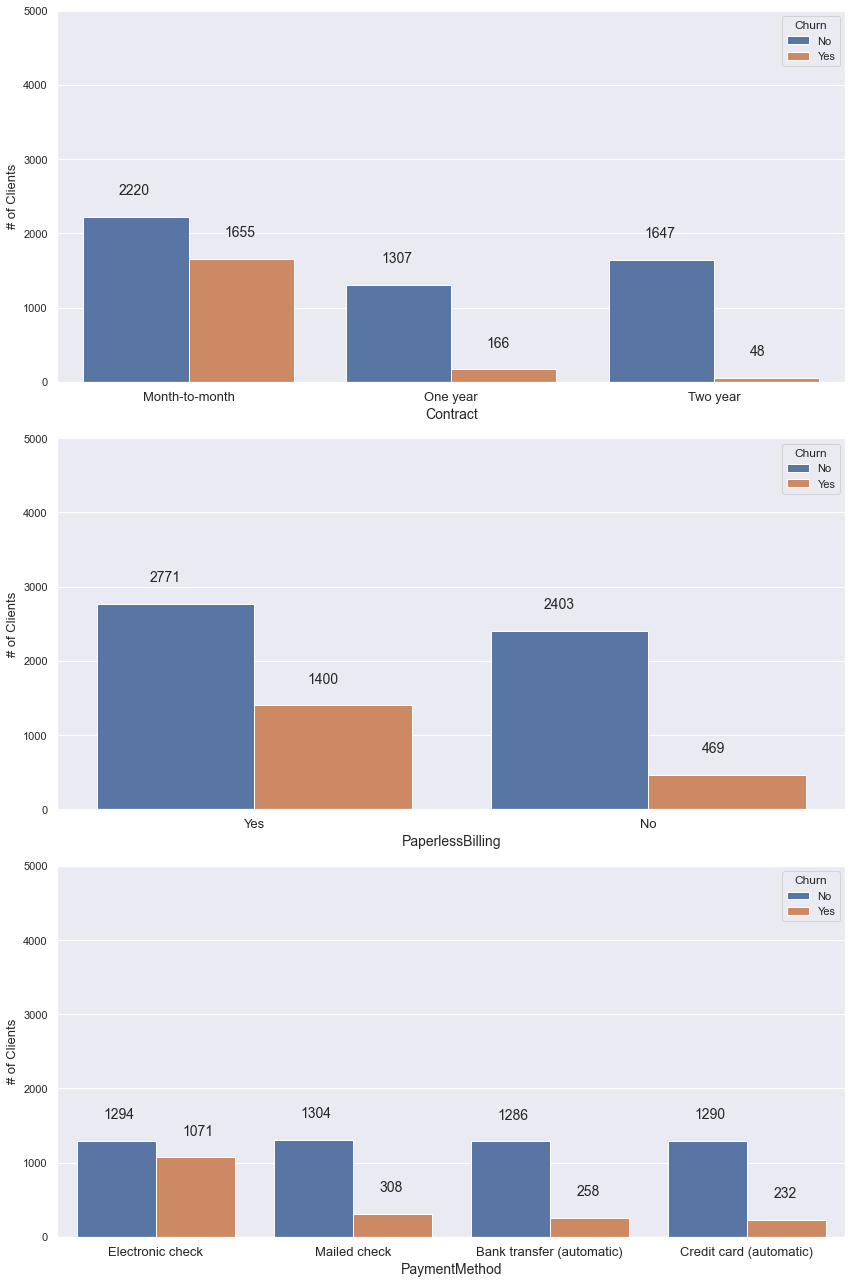

In [57]:
plt.figure(figsize=(12,18))

for i,col in enumerate(acc_info_features):    
    plt.subplot(3,1,i + 1)
    
    ax = sns.countplot(data = df, x = col, hue="Churn")

    plt.xlabel(col, fontsize= 14)
    plt.ylabel("# of Clients", fontsize= 13)
    plt.ylim(0,5000)
    plt.xticks(fontsize= 13)

    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.135, p.get_height()+300), fontsize= 14)

plt.tight_layout()

plt.show()

**Numerical Analysis**

In [49]:
numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

C:\Users\AIVEN JACK FULLMOON\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AIVEN JACK FULLMOON\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\AIVEN JACK FULLMOON\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

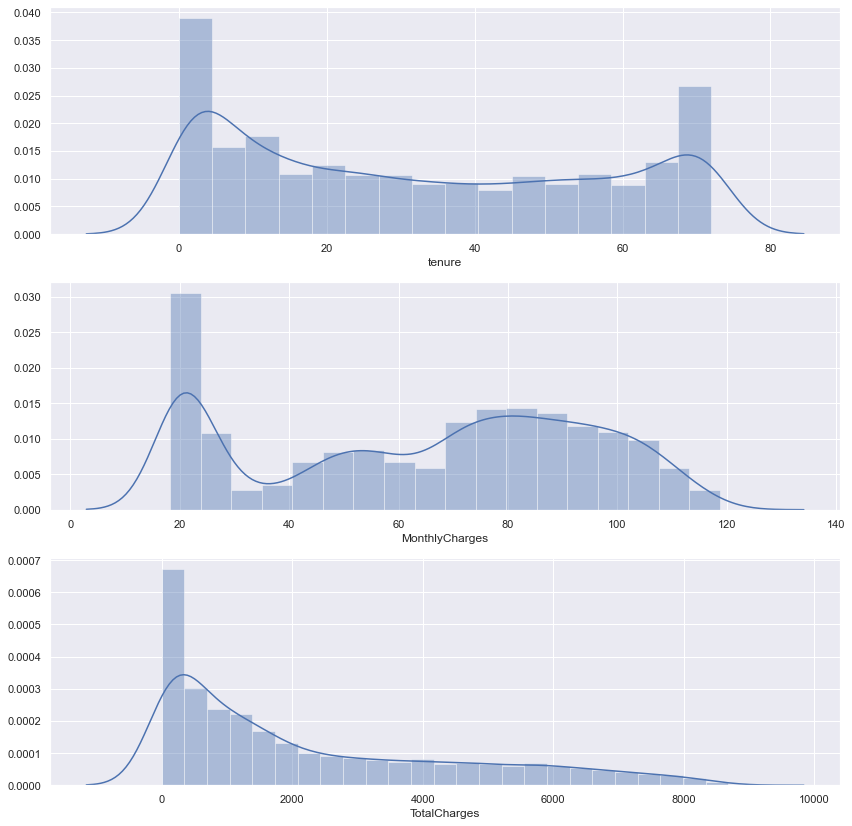

In [50]:
plt.figure(figsize=(12,15))

for i,col in enumerate(numerical_features):    
    plt.subplot(4,1,i + 1)
    sns.distplot(df.loc[:,col])
    plt.ylabel('')
    plt.tight_layout()

plt.show()

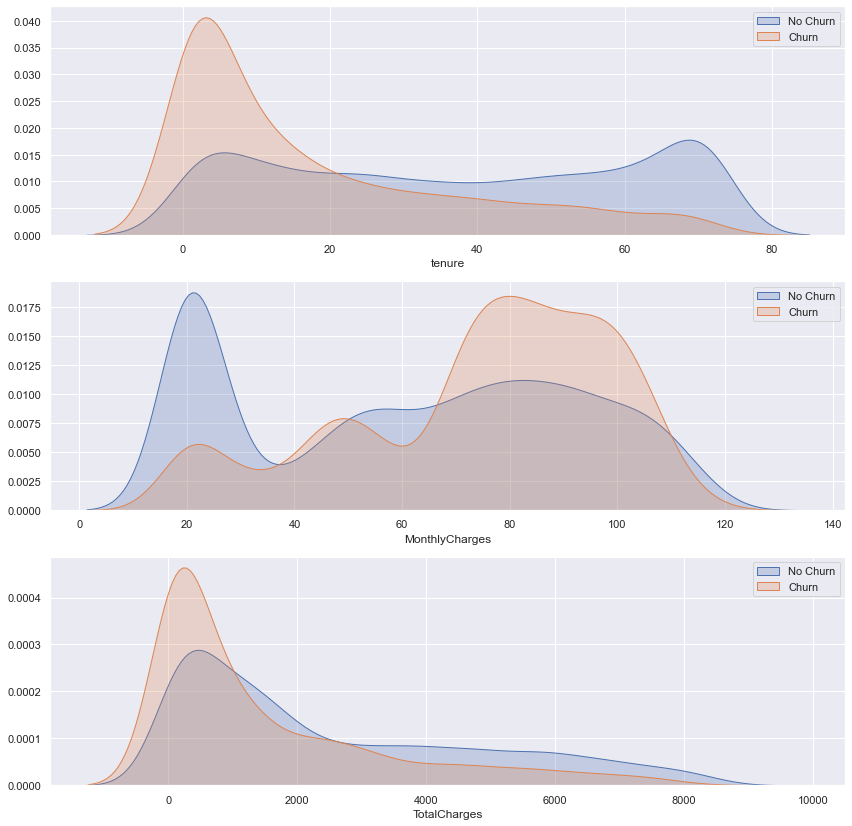

In [51]:
plt.figure(figsize=(12,15))

for i,col in enumerate(numerical_features):    
    plt.subplot(4,1,i + 1)    
    sns.kdeplot(df.loc[(df['Churn'] == 'No'), col], label = 'No Churn', shade = True)
    sns.kdeplot(df.loc[(df['Churn'] == "Yes"), col], label = 'Churn', shade = True)
    plt.legend()
    plt.ylabel('')
    plt.tight_layout()

plt.show()

- Tenure: High concentration of churned customer in the first months.
- Monthly Charges: High concentration of churned customer in higher values (around 60 and beyond)
- Total Charges: Somewhat similar distributions, but the ‘No churn’ distribution have lower values.